<a href="https://colab.research.google.com/github/MateoGiraz/python-optimization-simplex/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$
VECTORES \\
, c = [1,0,7,0,0,0] \\
, d = [0,d_0, d_0, d_0, d_0, d_0] \\
, p_{max} = [p_1, 0, ∞,0,0,0] \\
, y_{max} = [100,100,100,100,100,100] \\ 
$

$RESTRICCIONES \ GENERICAS\\
\\
, p_1 + y_{61} - y_{12} = d_1\\
, p_2 + y_{12} - y_{23} = d_2 \\
, p_3 + y_{23} - y_{34} = d_3 \\
, p_1 + y_{34} - y_{45} = d_4 \\
, p_1 + y_{45} - y_{56} = d_5 \\
, p_6 + y_{56} - y_{61} = d_6 \\
 \\
0 \leq p_i \leq p_i Max \ \forall i,j\\
0 \leq y_{ij} \leq y_{ij} Max \ \forall i,j\\ 
$

$
FUNCION \ OBJETIVO \\
min(c_1p_1+c_3p_3)
$

In [ ]:
# GLOBAL VARIABLES

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

In [ ]:
import numpy as np
import cvxpy as cp


def byeLimits(mat,pMax,yMax) :
  for i in range(6) :
    if(pMax[i]==-1):
      posRow = i+6
      posCol = i
      mat[posRow][posCol]=-1

    if(yMax[i]==-1):
      posRow = i+12
      posRow2 = i+18
      posCol = i+6
      mat[posRow][posCol]=-1
      mat[posRow2][posCol]=-1


def addBridgeEq(bridge,mat) :
  yFrom=bridge[0]
  yTo=bridge[1]
  mat[int(yFrom)-1][12]=-1
  mat[int(yTo)-1][12]=1

def getSolution(d,c,yMax,pMax,bridge):
  m0=[0,0,0,0,0,0]
  
  
  # Definimos vector variables x: 6p , 6y , yBridge
  x = cp.Variable(13) 


  #-------------FORMULACION DE FUNCION OBJETIVO-------------#

  # vector para usar en el producto usual
  c2= np.concatenate((c,m0,[0])) 

  # para cvxpy el producto matricial es con @. (c.T es la traspuesta de c).
  objective = cp.Minimize(c2.T @ x) 


  #-------------FORMULACION DE CONSTRAINTS------------------#

  # Igualdades:

  matEq=[[1,0,0,0,0,0,-1,0,0,0,0,1,0],
         [0,1,0,0,0,0,1,-1,0,0,0,0,0],
         [0,0,1,0,0,0,0,1,-1,0,0,0,0],
         [0,0,0,1,0,0,0,0,1,-1,0,0,0],
         [0,0,0,0,1,0,0,0,0,1,-1,0,0],
         [0,0,0,0,0,1,0,0,0,0,1,-1,0]]
  
  if bridge!="" : addBridgeEq(bridge,matEq)
  A = np.matrix(matEq) 
  

  # Desigualdades: 
  """
  Primeras 6 lineas: p >= 0 :  -p <= 0
  Otras 6 lineas p <= pMax 
  Otras 7 lineas y <= yMax
  Otras 7 lineas y >= -yMax :  -y <= yMax  
  """


  mat=[[-1,0,0,0,0,0,0,0,0,0,0,0,0],
       [0,-1,0,0,0,0,0,0,0,0,0,0,0],
       [0,0,-1,0,0,0,0,0,0,0,0,0,0],
       [0,0,0,-1,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,-1,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,-1,0,0,0,0,0,0,0],

       [1,0,0,0,0,0,0,0,0,0,0,0,0],
       [0,1,0,0,0,0,0,0,0,0,0,0,0],
       [0,0,1,0,0,0,0,0,0,0,0,0,0],
       [0,0,0,1,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,1,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,1,0,0,0,0,0,0,0],
       
       [0,0,0,0,0,0,1,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,1,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,1,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,1,0,0,0],
       [0,0,0,0,0,0,0,0,0,0,1,0,0],
       [0,0,0,0,0,0,0,0,0,0,0,1,0],
       [0,0,0,0,0,0,0,0,0,0,0,0,1],
       
       [0,0,0,0,0,0,-1,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,-1,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,-1,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,-1,0,0,0],
       [0,0,0,0,0,0,0,0,0,0,-1,0,0],
       [0,0,0,0,0,0,0,0,0,0,0,-1,0],
       [0,0,0,0,0,0,0,0,0,0,0,0,-1]]

  # Busca '-1' en los inputs y modifica la matriz
  byeLimits(mat,pMax,yMax)

  B = np.matrix(mat)
  b=np.concatenate((m0,pMax,yMax,[yMax[0]],yMax,[yMax[0]]))


  # Constraints: 
  constraints = [A @ x == d, B @ x <= b]


  #---------------MODELADO y SOLUCION-----------------------#

  prob = cp.Problem(objective, constraints)
  result = prob.solve(solver = 'GLPK') 

  return [result,x.value]


In [ ]:

def getMaxD0(c,yMax,pMax,bridge) :
  d0Vec = []
  costVec = []
  d0=1

  while True :
    d=[0,d0,d0,d0,d0,d0]
    cost = getSolution(d,c,yMax,pMax,bridge)[0]

    if cost==float('inf') :
      d0=round(d0-0.1,1)
      return [d0,d0Vec,costVec]

    d0Vec.append(round(d0,1))
    costVec.append(round(cost,1))
    d0+=0.1


In [ ]:
def getBestBridge(c,yMax,pMax,bridges):
  d0Vec=[]
  costs=[]

  bestBridge=""
  maxD0=-1
  minCost=0
  for bridge in bridges :
    res = getMaxD0(c,yMax,pMax,bridge)
    d0=res[0]
    cost=res[2][-1]

    if  maxD0==-1 or d0>maxD0 or (d0==maxD0 and cost<minCost) :
      maxD0=d0
      bestBridge=bridge
      d0Vec=res[1]
      costs=res[2]
  
  return [bestBridge,d0Vec,costs]

Max d0: 66.6 , Costo: 1131.0


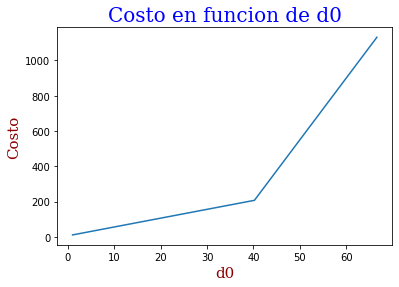

In [ ]:
import matplotlib.pyplot as plt


# PARTE C

c=[1,0,7,0,0,0]
yMax=[100,100,100,100,100,100]
pMax=[-1,0,-1,0,0,0]

res = getMaxD0(c,yMax,pMax,"")

print(f"Max d0: {res[0]} , Costo: {res[2][-1]}")
plt.plot(res[1],res[2])
plt.title("Costo en funcion de d0",fontdict = font1)
plt.xlabel("d0",fontdict = font2)
plt.ylabel("Costo",fontdict = font2)

plt.show()

DOCUMENTACIÓN:

Las primeras dos imágenes muestran por qué 66,6 es la demanda máxima. Si superamos este número no podemos abastecer todos los nodos. Esto ocurre porque los puentes tienen capacidad máxima 100.

La pendiente de la gráfica cambia en d0 = 40. Hasta ese punto usa p1 (menor costo), y luego comienza a usar p3. La tercera y cuarta imagen muestran por qué 40 es la demanda límite para usar solamente lo producido por p1.

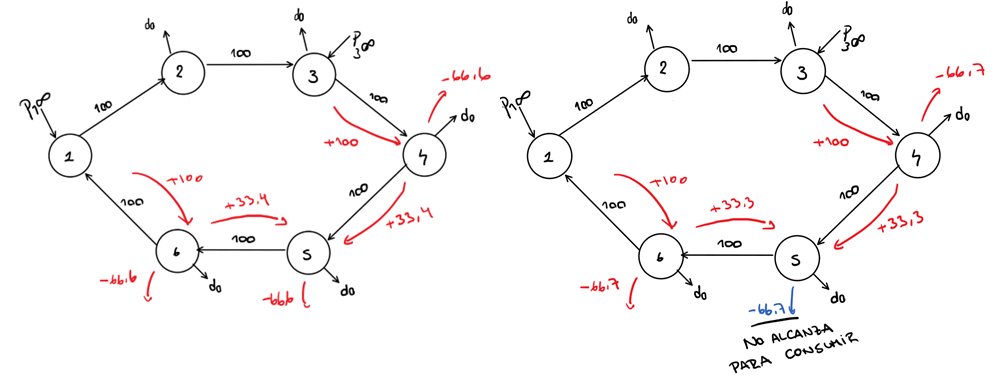


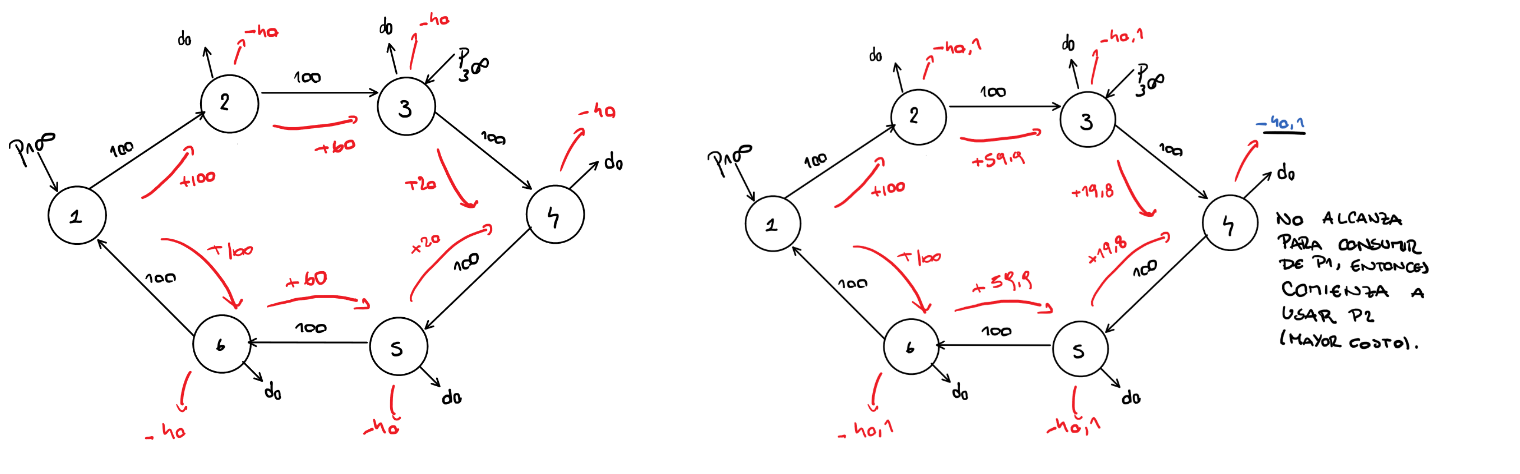

Max d0: 66.6 , Costo: 1731.0


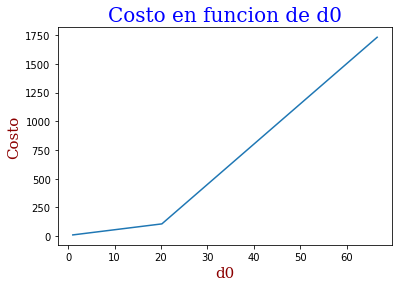

In [ ]:
import matplotlib.pyplot as plt

# PARTE D

c=[1,0,7,0,0,0]
yMax=[100,100,100,100,100,100]
pMax=[100,0,-1,0,0,0]

res = getMaxD0(c,yMax,pMax,"")

print(f"Max d0: {res[0]} , Costo: {res[2][-1]}")
plt.plot(res[1],res[2])
plt.title("Costo en funcion de d0",fontdict = font1)
plt.xlabel("d0",fontdict = font2)
plt.ylabel("Costo",fontdict = font2)

plt.show()











DOCUMENTACIÓN:

En este caso, el productor p1 tiene producción máxima = 100, entonces el sistema utiliza solamente lo producido por p1 hasta demanda = 20, y el motivo puede comprobarse en las dos imágenes siguientes. 

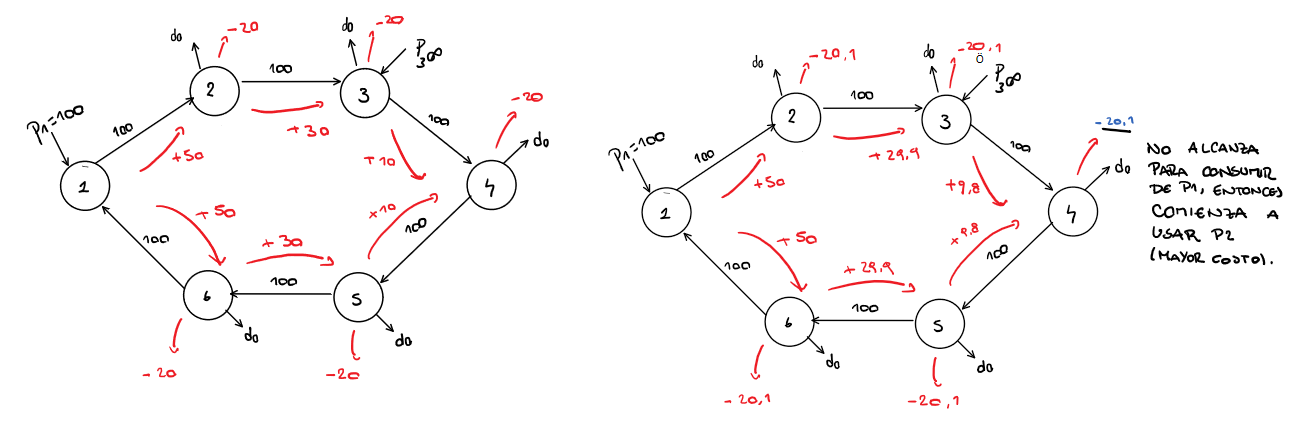



Mejor Puente: 1 a 4
Max d0: 100.0 , Costo: 1700.0


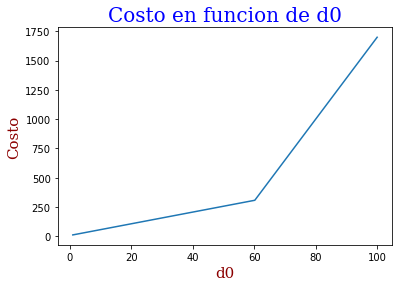

In [ ]:
import matplotlib.pyplot as plt

# PARTE E y F

c=[1,0,7,0,0,0]
yMax=[100,100,100,100,100,100]
pMax=[-1,0,-1,0,0,0]

bridges=["13","14","15","24","25","26","36","35","46"]
res = getBestBridge(c,yMax,pMax,bridges)

print(f"Mejor Puente: {res[0][0]} a {res[0][1]}")
print(f"Max d0: {res[1][-1]} , Costo: {res[2][-1]}")

plt.plot(res[1],res[2])
plt.title("Costo en funcion de d0",fontdict = font1)
plt.xlabel("d0",fontdict = font2)
plt.ylabel("Costo",fontdict = font2)

plt.show()














En la parte c, al aumentar el d0 encontramos nodos que no satisfacen la demanda, no por falta de produccion (producción infinita), sino por falta de transporte (puentes con capacidad limitada). Al añadir un puente se consiguen satisfacer demandas mayores. En las primeras dos imágenes se ilustra por qué el d0 máximo es 100.

La pendiente de la gráfica cambia en d0 = 60. Hasta ese punto usa p1 (menor costo), y luego comienza a usar p3. La tercera y cuarta imagen muestran por qué 60 es la demanda límite para usar solamente lo producido por p1.

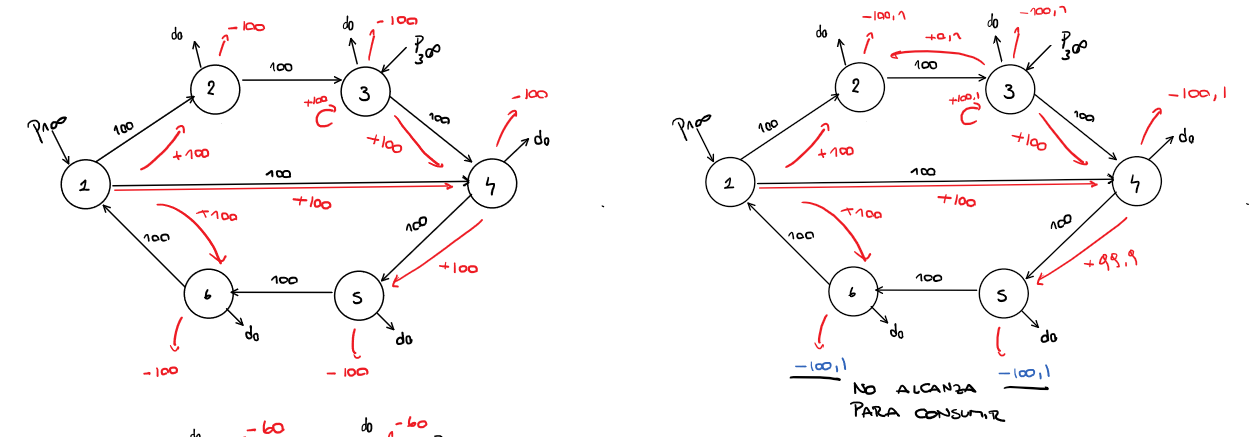

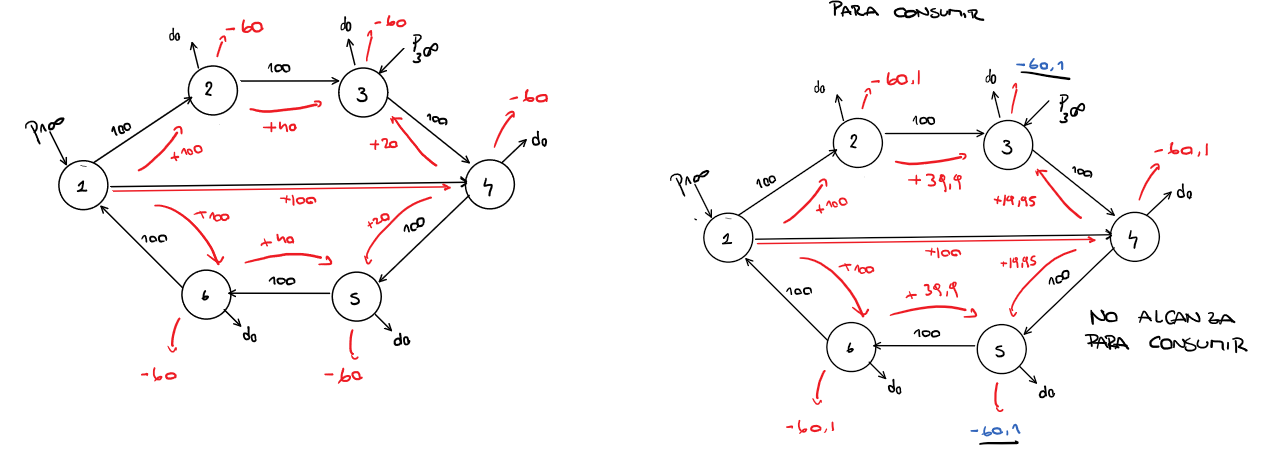

Mejor Puente: 3 a 6
Max d0: 100.0 , Costo: 2900.0


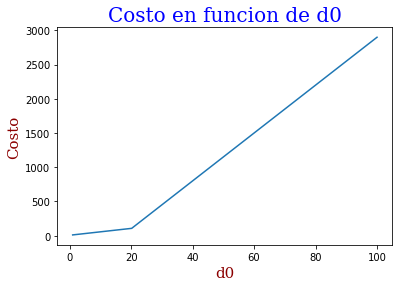

In [ ]:
import matplotlib.pyplot as plt

# PARTE G

c=[1,0,7,0,0,0]
yMax=[100,100,100,100,100,100]
pMax=[100,0,-1,0,0,0]

bridges=["13","14","15","24","25","26","36","35","46"]

res = getBestBridge(c,yMax,pMax,bridges)

print(f"Mejor Puente: {res[0][0]} a {res[0][1]}")
print(f"Max d0: {res[1][-1]} , Costo: {res[2][-1]}")

plt.plot(res[1],res[2])
plt.title("Costo en funcion de d0",fontdict = font1)
plt.xlabel("d0",fontdict = font2)
plt.ylabel("Costo",fontdict = font2)

plt.show()

El puente que consideramos es 3 - 6. Se cambia el puente anterior porque existe producción máxima = 100 para el productor 1, y con estas condiciones es imposible abastecer demanda d0 = 100. Esto se muestra en las primeras dos imágenes.

El motivo por el cual la pendiente de la gráfica cambia en 20 es análogo al ejercicio d. p1 tiene producción máxima = 100, que divide entre 5 nodos, entonces 20 es la demanda máxima.

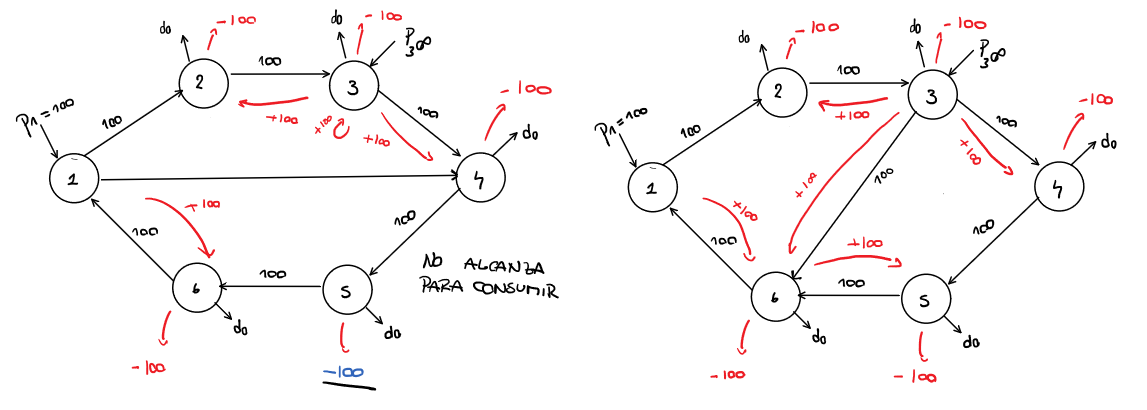